MN5813
Farhan Nadeem Butt
2501260
Individual Project(IMDB & Streaming Platforms)

GENERATIVE AI: AI was used in this assignment to perfect the visulizations created along with different ideas and tips such as having a unique name in both of the column before merging them together. Furhtermore it was used to present ideas on how to tackle different problems encountered during creating the library.

# 

INTRODUCTION:The purpose of this project is to analyze and process data from 2 data sets IMDB and Streaming platforms. IMDBs data set consists of top 1000 movies with multiple columns such as series title, released date, IMDB rating and more. Whereas the streaming platform data set consists of 9514 movies along with the rotten tomato scores given to them and the platforms the movies are available on. 
The aim of this project is to clean, wrangle the large set of two different datasets and to merge them together to find insights such as
1.	Most number of movies available on each streaming platform 
2.	Top 10 Stars with the most movies
3.	Top 10 movies with the highest rotten tomato ratings
4.	Distribution of high rated movies across streaming platforms 
5.	Top 10 movies by IMDB ratings
6.	Average IMDB rating by genre
Through creating meaningful visualizations such as box plots, scatter plots, tree maps and bar charts to find insights on what are the top-ranking movies, what’s the leading streaming platform in terms of having highly rated movies, how IMDB ratings differentiate from Rotten Tomato ratings, what genre is preferred more to the audience and actors with the most movie appearances.


LOAD DATA

https://github.com/farhannbutt/farhans-assignment

Importing necessary Libraries

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import squarify

3.01 Reading CSV file & LOADING DATA
First step towards cleaning the data set is to import the downloaded data set into Jupiter notebook. The function is derived from the panda’s library which is used to load data from a CSV file.


In [22]:
# Reading the CSV files for IMDb dataset
imdb_df = pd.read_csv(r'C:\Users\Farhan Butt\OneDrive\Desktop\IMDB Individual Project\archive (5).zip')

# Standardize column names (to remove any spaces)
imdb_df.columns = imdb_df.columns.str.strip()

In [23]:
# Drop the 'Poster_Link' and 'Overview' columns
if 'Poster_Link' in imdb_df.columns:
    imdb_df.drop(columns=['Poster_Link'], inplace=True)
if 'Overview' in imdb_df.columns:
    imdb_df.drop(columns=['Overview'], inplace=True)


3.0.2 Dropping ‘Poster_Link’ and ‘Overview’ columns:
Once the file had been successfully loaded into Jupiter notebook the next goal was to start off with the cleaning process. After carefully looking at the data set, 2 columns ‘Poster_Link' and 'Overview' were of no use to the analysis and had to be dropped.  To drop the said columns an ‘If’ statement was used to check if the column exists and if the column existed ‘imdb_df.drop’
Command was used to drop the column. (GG, 2024)


In [28]:
# Check for missing values in the dataset
missing_values = imdb_df.isnull().sum()

# Display the columns with missing values and their counts
print("Missing values per column before cleaning:")
print(missing_values)


Missing values per column before cleaning:
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64


3.0.3 Check for missing values:
After dropping the columns. A check was initiated to see how many values are missing from the data set. 
To implement the check a variable ‘missing_values’ was created which checks for null values in each column of the data set ‘imdb_df’ (MIAMI UNIVERSITY, n.d.) after completing the check a print statement is generated which displays the columns for the missing values. It was deduced that a total of 427 values were missing
from the three different columns ‘Certificate’, ‘Meta_score’ and ‘Gross’.


In [31]:
# Drop rows where 'Gross' has missing values
imdb_df.dropna(subset=['Gross'], inplace=True)

# Check the first few rows of the dataset
print(imdb_df.head(5))

# Check the updated 'Gross' values after dropping missing rows
print("Updated 'Gross' values after dropping missing rows:")
print(imdb_df['Gross'].head(5))  # Display the first 10 rows of the 'Gross' column

# Check for missing values after dropping rows with missing 'Gross' values
updated_missing_values = imdb_df.isnull().sum()


               Series_Title Released_Year Certificate  Runtime  \
0  The Shawshank Redemption          1994           A  142 min   
1             The Godfather          1972           A  175 min   
2           The Dark Knight          2008          UA  152 min   
3    The Godfather: Part II          1974           A  202 min   
4              12 Angry Men          1957           U   96 min   

                  Genre  IMDB_Rating  Meta_score              Director  \
0                 Drama          9.3        80.0        Frank Darabont   
1          Crime, Drama          9.2       100.0  Francis Ford Coppola   
2  Action, Crime, Drama          9.0        84.0     Christopher Nolan   
3          Crime, Drama          9.0        90.0  Francis Ford Coppola   
4          Crime, Drama          9.0        96.0          Sidney Lumet   

            Star1           Star2          Star3           Star4  No_of_Votes  \
0     Tim Robbins  Morgan Freeman     Bob Gunton  William Sadler      2343110

3.0.4 Dropping rows with no gross values:
Another column which needed cleaning as mentioned before was the column of gross values. There was a total of 160 movies with missing gross value. Having gross values is crucial to the analysis as later in the visualisation section a good comparison of high rated IMDB movies against gross earned by each movie can be deduced. Thus, missing gross values could hinder the result of the visualisation which is why the command ‘imdb_df.dropna(subset=['Gross'], inplace=True)’ was used which is basically using the ‘dropna’ function from the gross section rows which have missing values and the ‘inplace=True’ parameter ensures that the changes are applied to the original dataset without creating a new one. (Schwartz, 2022)


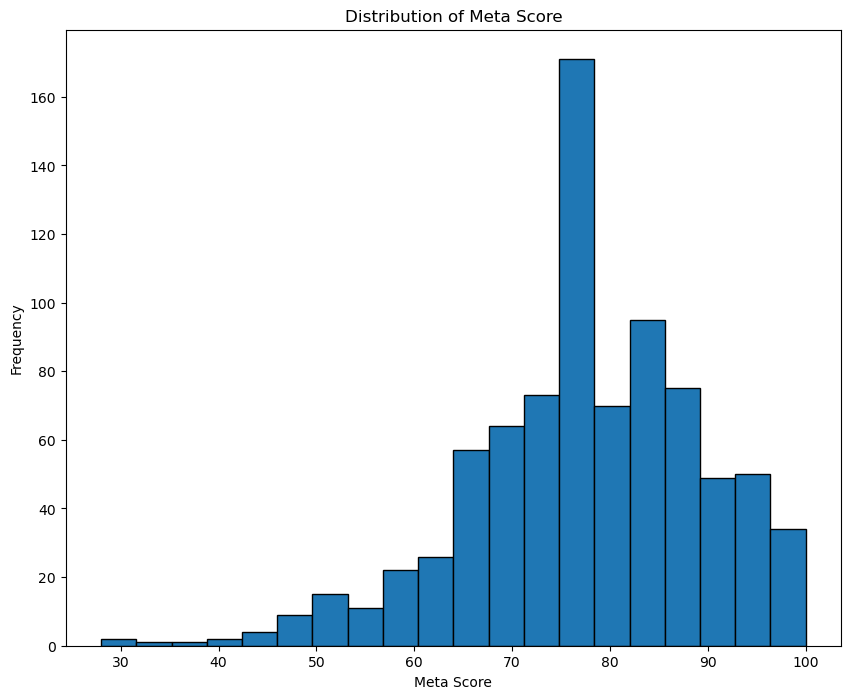

Updated missing values per column after filling 'Meta_score' with median:
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64


In [96]:
# Check on how to fill meta score values (Graph first to check skewness)
# Plot histogram for Meta Score to check skewness of the graph
plt.figure(figsize=(10, 8))
plt.hist(imdb_df['Meta_score'].dropna(), bins=20, edgecolor='black')
plt.title('Distribution of Meta Score')
plt.xlabel('Meta Score')
plt.ylabel('Frequency')
plt.show()

# Calculate the median of 'Meta_score'
meta_median = imdb_df['Meta_score'].median()

# Fill missing 'Meta_score' values with the median
imdb_df['Meta_score'] = imdb_df['Meta_score'].fillna(meta_median)

# Displaying the updated missing values per column
updated_missing_values = imdb_df.isnull().sum()
print("Updated missing values per column after filling 'Meta_score' with median:")
print(updated_missing_values)

3.0.5 Meta Score:
Next column which needs to be targeted is the ‘Meta_score’ column which had 157 missing values. According to (P., 2023) a common approach to impute handle missing values is to replace those values by taking mean or median as there were not a significant number of values missing from the table. According to (Abdallah, 2023) mean imputations can be used If the distribution of the data is normal, median is imputation is appropriate when the distribution of the given data is skewed either towards the left or right. A histogram for the meta score column was created excluding the missing values in the data set with the use of ‘dropna()’ function. The x-label of the graph shows the ‘Meta score’ divided into 20 bins and the y-axis shows the ‘frequency’ which is the number of movies whose meta score falls into each bin. (Kamradt, 2020)
Upon creating the visualisation of the ‘Meta_score’ it was deduced that the histogram is skewed towards the left which would mean that the appropriate way to handle missing values would be to take the median and fill the missing values. To take the median a variable ‘meta_median’ was created which calculates the median of the ‘Meta_score’ column in the ‘imdb_df’ data frame (trymito, 2024).Finally, all that’s left to do is to fill the missing columns with the newly generated median implemented using the built in ‘fillna’ function in pandas with the name of the variable in the parenthesis and a print statement to display the updated column. Having missing values of ‘Meta_score’ would help with analysis further down the line.


In [37]:
# Updating the missing values for the certificate column with unknown
imdb_df['Certificate'] = imdb_df['Certificate'].fillna('Unknown')

# Check the updated missing values per column
updated_missing_values = imdb_df.isnull().sum()
print("Updated missing values per column after filling 'Certificate':")
print(updated_missing_values)

Updated missing values per column after filling 'Certificate':
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64


3.0.6 Certificate Column:
The last column with the missing values is the certificate column. As the column is not important to my analysis thus instead of filling the missing values with the appropriate certificates, replacing the missing values with ‘Unknown’ seemed more viable. Most of the movies in the list with missing values are from the early 1900’s which was deduced after a comprehensive look over the data set. To fill the missing values with ‘unknown’ ‘fillna()’ method was implemented which is responsible for replacing NULL values with a specified value. (W3schools, 2024). After replacing the missing values, a print statement was generated which checks any missing values after the update for which the result is stored in the variable ‘updated_missing_vlaues’.


In [40]:
 #Fixing special characters in stars' names
# defining a function to clean the actors names 
def clean_name(name):
    if pd.isna(name):  # Checking if value is NAN
        return name
    # Using regex to remove special characters and numbers
    return re.sub(r'[^a-zA-Z\s]', '', name)

# Applied the cleaning function to each of the actor columns
actor_columns = ['Star1', 'Star2', 'Star3', 'Star4']
for col in actor_columns:
    imdb_df[col] = imdb_df[col].apply(clean_name)

# Verifying the cleaned actor names
print("Cleaned actor names:")
print(imdb_df[actor_columns].head(5))
# ----------------------------------------------------------------------------


Cleaned actor names:
            Star1           Star2          Star3           Star4
0     Tim Robbins  Morgan Freeman     Bob Gunton  William Sadler
1   Marlon Brando       Al Pacino     James Caan    Diane Keaton
2  Christian Bale    Heath Ledger  Aaron Eckhart   Michael Caine
3       Al Pacino  Robert De Niro  Robert Duvall    Diane Keaton
4     Henry Fonda      Lee J Cobb  Martin Balsam    John Fiedler


3.0.7 Special Characters in Star names:
In the data set there are 4 columns labelled ‘Star1’, ‘Star2’, ‘Star3’ and ‘Star4’ these 4 columns can be deemed useful in future analysis and help with visualisations to determine which actors appeared in the most movies or to deduce the number of reoccurring stars in the highest rated movies. To carry out the analysis the “Star” columns were carefully analysed. A crucial insight was revealed which was that some of the names of the actors had special characters such as “@#$%%#@#” in their names which would look very odd whilst creating visualisations against star names. To mitigate this problem the ‘clean_name()’ function checks to see if the input value ‘(name)’ is not a not a number with the use of pandas built in ‘pd.isna’ if the function returns NAN it ensures that the cleaning logic doesn’t alter missing values in the data set. 
The next task after completing the check is to remove any special characters in the name of the actors to implement the task the built-in library of ‘re’ was imported in pandas to have access to the use of regex which is a sequence of characters which define a search pattern and can be used to match, replace or extract text from a string (SaturnCloud, 2023). To clean the unwanted special characters ‘re.sub’ function was used which is responsible for searching for all the instances in the given string and replacing them (Google for Education, 2024). The ‘re.sub’ was used to clean the input name of any characters which are not alphabetical (A-z, A-Z) or spaces such as (\s) with an empty string “” to ensure that any special characters or unwanted symbols are removed from the name of the actors.
After implementing regex and removing unwanted characters for character names the ‘cleaned_name’ function was used on the actor columns ‘Star1’, ‘Star2’, ‘Star3’ and ‘Star4’ to remove the special characters and a print statement to confirm the names had been cleaned.


In [43]:
# Removing duplicate rows
imdb_df.drop_duplicates(inplace=True)
print("duplicates removed if any")
# Check the first few rows of the dataset after changes
print(imdb_df.head(5))

duplicates removed if any
               Series_Title Released_Year Certificate  Runtime  \
0  The Shawshank Redemption          1994           A  142 min   
1             The Godfather          1972           A  175 min   
2           The Dark Knight          2008          UA  152 min   
3    The Godfather: Part II          1974           A  202 min   
4              12 Angry Men          1957           U   96 min   

                  Genre  IMDB_Rating  Meta_score              Director  \
0                 Drama          9.3        80.0        Frank Darabont   
1          Crime, Drama          9.2       100.0  Francis Ford Coppola   
2  Action, Crime, Drama          9.0        84.0     Christopher Nolan   
3          Crime, Drama          9.0        90.0  Francis Ford Coppola   
4          Crime, Drama          9.0        96.0          Sidney Lumet   

            Star1           Star2          Star3           Star4  No_of_Votes  \
0     Tim Robbins  Morgan Freeman     Bob Gunton  W

3.0.8 Removing duplicate rows:
A check for duplicate rows was initiated to eliminate reoccurring information to further increase the accuracy of the data set. ‘Drop_duplicates’ method was used which helps in removing duplicates from the data frame which is wither based on all columns any specifics in python (GeekforGeeks, 2024). After which a print statement was written to check the data set after implementing the changes.


In [98]:
# Checking the columns of the dataset after handling missing values
print("Columns after cleaning:")
print(imdb_df.columns)

Columns after cleaning:
Index(['Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre',
       'IMDB_Rating', 'Meta_score', 'Director', 'Star1', 'Star2', 'Star3',
       'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')


In [48]:
# Cleaning special characters in the movie titles (Series_Title column)
# defining a function to clean movie titles
def clean_title(title):
    if pd.isna(title):  # Checking if value is NAN
        return title
    # Using regex to remove special characters and numbers, keeping only alphabets and spaces
    return re.sub(r'[^a-zA-Z\s]', '', title)

# Applyinggd the cleaning function to the 'Series_Title' column to remove special characters
imdb_df['Series_Title'] = imdb_df['Series_Title'].apply(clean_title)

# Checking if there are any titles with special characters left
special_characters_in_titles = imdb_df[imdb_df['Series_Title'].str.contains(r'[^a-zA-Z\s]', regex=True)]

# If there are no special characters, printing a confirmation
if special_characters_in_titles.empty:
    print("All movie titles have been cleaned successfully. No special characters remaining.")
else:
    print(f"There are still {special_characters_in_titles.shape[0]} movie titles with special characters.")
#---------------------------------------------------------------------------------

All movie titles have been cleaned successfully. No special characters remaining.


3.0. 9 Special Characters in Series title:
A similar check as the one done in ‘Star_names’ was implemented to lookout for special characters in the names of the series. It was deduced that there was most names which consisted of special characters which could possibly hinder the analysis especially when merging the second data set. To mitigate this the function ‘clean_title’ was created which was used to remove any special characters from the series titles. Use of regex was implemented here again with ‘re.sub’ to check for any special characters which are not alphabetical (A-z, A-Z) or spaces such as (\s) with an empty string “”. Finally, a print statement was generated with a confirmation and if not, the print statement reports as to how many titles still contain special characters.


In [51]:
# Check the first few rows of the cleaned 'Series_Title' column
print("Cleaned 'Series_Title' column:")
print(imdb_df['Series_Title'].head(5))


Cleaned 'Series_Title' column:
0    The Shawshank Redemption
1               The Godfather
2             The Dark Knight
3       The Godfather Part II
4                   Angry Men
Name: Series_Title, dtype: object


In [53]:
# ------------------------------------------------------------
# Cleaning Streaming Platform Dataset
# ------------------------------------------------------------
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [55]:
# Reading the CSV files for IMDb dataset
streaming_df = pd.read_csv(r'C:\Users\Farhan Butt\OneDrive\Desktop\IMDB data-set2\archive (6).zip')

3.1.1 reading CSV file
 Like reading the IMDB data set the streaming data set is downloaded into Jupiter notebook. The function is derived from the panda’s library which is used to load data from a CSV file.


In [58]:
# Check for missing values
missing_values = streaming_df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
Unnamed: 0            0
ID                    0
Title                 0
Year                  0
Age                4177
Rotten Tomatoes       7
Netflix               0
Hulu                  0
Prime Video           0
Disney+               0
Type                  0
dtype: int64


3.1.2 Missing value check
After loading the data set into pandas a check is initiated to see how many values from the different columns are missing with the use of the function ‘missing_values’  and ‘isnull().sum()’ to have a count of the missing from the columns. It was deduced that 2 out of the 10 columns had missing values and had to be dealt with accordingly.


In [61]:
# Drop the 'Age' column because it already exists in dataset1
streaming_df.drop(columns=['Age'], inplace=True)

# Verifying the column has been dropped
print("Columns after dropping 'Age':")
print(streaming_df.columns)


Columns after dropping 'Age':
Index(['Unnamed: 0', 'ID', 'Title', 'Year', 'Rotten Tomatoes', 'Netflix',
       'Hulu', 'Prime Video', 'Disney+', 'Type'],
      dtype='object')


3.1.3 Dropping AGE column:
As depicted by the missing value check there are 4177 age columns missing which is a large chunk of data and since there is already an age group column in the IMDB data set it only makes sense to drop this column for a more accurate analysis. To drop the column ‘streaming_df.drop’ along with the column name was used and a print statement to verify that the column had been dropped.


In [64]:
# dropping type column because its unnecessary 
streaming_df.drop(columns=['Type'], inplace=True)
print("column type has been dropped")


column type has been dropped


3.1.4 Type column:
Similarly, the type of column was dropped as well as the column did not have any significant data in it which could be used for analysis and visualizations.


In [67]:
# updated missing values
updated_missing_values = streaming_df.isnull().sum()
print("Missing values per column after dropping 'Age':")
print(updated_missing_values)

Missing values per column after dropping 'Age':
Unnamed: 0         0
ID                 0
Title              0
Year               0
Rotten Tomatoes    7
Netflix            0
Hulu               0
Prime Video        0
Disney+            0
dtype: int64


In [69]:
# dropping rows of movies which have missing rotten tomato ratings 
streaming_df.dropna(subset=['Rotten Tomatoes'], inplace=True)
# verifying that the values have dropped 
print("missing rotten tomatoes have been dropped")
print("Updated missing values per column:")
print(streaming_df.isnull().sum())

missing rotten tomatoes have been dropped
Updated missing values per column:
Unnamed: 0         0
ID                 0
Title              0
Year               0
Rotten Tomatoes    0
Netflix            0
Hulu               0
Prime Video        0
Disney+            0
dtype: int64


3.1.5 Rotten Tomatoes:
Next column with the missing values is the Rotten tomatoes column in which 7 values are missing to address them it was decided to have them dropped, as it’s significantly a small chunk of data which would not hinder the analysis. To drop the rows with missing rotten the code checks for rows with NAN values, the subset ensures only the rotten tomatoes column is checked and finally ‘inplace=true’ ensures the original data frame is modified without creating any copies. A print statement is written which outputs the updated missing values after cleaning.


In [72]:
# renaming the column series_title to title for help during merge
streaming_df.rename(columns={'Title': 'Series_Title'}, inplace=True)
print("column name changed")

column name changed


In [74]:
#  merging the datasets
# ------------------------------------------------------------

# Merge the two datasets on 'Series_Title' 
merged_df = pd.merge(imdb_df, streaming_df, on='Series_Title', how='inner')  # 'inner' keeps only matching rows

# Counting how many Series_Title are the same in both datasets (after merging)
matching_titles_count = merged_df.shape[0]

# Print the result
print(f"Number of matching 'Series_Title' in both IMDb and Streaming platform datasets: {matching_titles_count}")


# Check the merged dataset
print("First 10 rows of the merged dataset:")
print(merged_df.head(10))


Number of matching 'Series_Title' in both IMDb and Streaming platform datasets: 153
First 10 rows of the merged dataset:
                   Series_Title Released_Year Certificate  Runtime  \
0               The Dark Knight          2008          UA  152 min   
1                    Fight Club          1999           A  139 min   
2                         Joker          2019           A  122 min   
3              The Intouchables          2011          UA  112 min   
4                  The Departed          2006           A  151 min   
5                   The Pianist          2002           R  150 min   
6                 The Lion King          1994           U   88 min   
7  Once Upon a Time in the West          1968           U  165 min   
8                        Psycho          1960           A  109 min   
9                        Dangal          2016           U  161 min   

                         Genre  IMDB_Rating  Meta_score           Director  \
0         Action, Crime, Drama

After cleaning and wrangling the data set the next step was to merge the data sets together. To merge the data sets there was the column name ‘series_title” had to be both in both data sets/ In the streaming data set the movies column was named title thus the title had to be changed to see how many of the movies were same in both data sets. To change the name of the data set for streaming platform ‘rename()’ function was used. This method essentially allows renaming specific columns by passing a dictionary (Geek for Geeks, 2024) with a print statement declaring the column name has been changed.
After successfully changing the column names and making sure that both data sets contain the same column ‘sereis_title’ it was time to merge them. To merge the data sets using the “merge()” method which updates the contents of the two data frames by merging them together (W3schools, 2024). The “pd.merge” function ensured that only rows with matching values in both of the columns are retained along with the inner merge which is responsible for creating a new data frame that only included the rows that have key values present in both of the data sets. (Delovski, 2023)
Once the merge had been completed successfully it was important to count how many series title were the same in both data sets. This was crucial to the analysis as the movies in both data sets must be the same for an accurate analysis. To count the number of similar movie titles in both of the data sets ‘df.shape’ was used which returns a tuple representing the dimensionality of the data frame (pandas, 2024). In my case ‘merged_df.shape[0]’ represents the total count of rows in the merged data frame. 
Lastly, a print statement was generated to ensure how many of the movies in both Data sets were the same. Out of the large chunk of data from both data sets it was deduced that there were 273 matching titles in both movie sets.


In [100]:
# Cleaning special characters in the movie titles (Series_Title column)
# Defining a function to clean movie titles
def clean_title(title):
    if pd.isna(title):  # Checking if value is NAN
        return title
    # Using regex to remove special characters and numbers, keeping only alphabets and spaces
    return re.sub(r'[^a-zA-Z\s]', '', title)

# Apply the cleaning function to the 'Series_Title' column to remove special characters
streaming_df['Series_Title'] = streaming_df['Series_Title'].apply(clean_title)

# Checking if there are any titles with special characters left
special_characters_in_titles = streaming_df[streaming_df['Series_Title'].str.contains(r'[^a-zA-Z\s]', regex=True)]

# If there are no special characters, print a confirmation
if special_characters_in_titles.empty:
    print("All movie titles have been cleaned successfully. No special characters remaining.")
else:
    print(f"There are still {special_characters_in_titles.shape[0]} movie titles with special characters.")

# Display the first 10 rows of the cleaned 'Series_Title' column
print("First 10 rows of the cleaned 'Series_Title' column:")
print(streaming_df['Series_Title'].head(10))

# ---------------------------------------------------------------------------- 

All movie titles have been cleaned successfully. No special characters remaining.
First 10 rows of the cleaned 'Series_Title' column:
0                               The Irishman
1                                     Dangal
2    David Attenborough A Life on Our Planet
3           Lagaan Once Upon a Time in India
4                                       Roma
5           To All the Boys Ive Loved Before
6                         The Social Dilemma
7                                       Okja
8               The Ballad of Buster Scruggs
9                  The Trial of the Chicago 
Name: Series_Title, dtype: object


3.1.6 cleaning special characters in movie titles:
In the data frame the movies title section had special characters like the ones observed in the IMDB’s data set. A similar approach was taken to deal with the special characters in this data as well which is by creating a function ‘clean_title’ and using regex to remove any special characters such as “@#$%%#@#”. The cleaning function is applied to the ‘Series_title’ column after which check is done to see if there are any remaining names with special characters. If there are no special characters left a print statement is generated which prints “all movie titles have been cleaned. No special characters remain” if not another print statement is generated displaying the remaining special characters.


In [102]:
# ---------------------------------------------------------------------------- 
# Displaying the first 10 rows of the updated dataset
print("First 10 rows of the updated dataset:")
print(streaming_df.head(10))

First 10 rows of the updated dataset:
   Unnamed: 0  ID                             Series_Title  Year  \
0           0   1                             The Irishman  2019   
1           1   2                                   Dangal  2016   
2           2   3  David Attenborough A Life on Our Planet  2020   
3           3   4         Lagaan Once Upon a Time in India  2001   
4           4   5                                     Roma  2018   
5           5   6         To All the Boys Ive Loved Before  2018   
6           6   7                       The Social Dilemma  2020   
7           7   8                                     Okja  2017   
8           8   9             The Ballad of Buster Scruggs  2018   
9           9  10                The Trial of the Chicago   2020   

  Rotten Tomatoes  Netflix  Hulu  Prime Video  Disney+  
0          98/100        1     0            0        0  
1          97/100        1     0            0        0  
2          95/100        1     0          

DATA WRANGLING

In [84]:
# Adding new column Dominant Genre 

# step 1 make the new column dominant genre 
merged_df['Dominant_Genre'] = merged_df['Genre'].str.split(',').str[0].str.strip()

# step 2 analysing imdb rating based on dominant genre 
genre_ratings = merged_df.groupby('Dominant_Genre')['IMDB_Rating'].mean().sort_values(ascending=False)


Dominant Genre IMDB:
After carefully analyzing the data set and cleaning it an extra column which could be helped in the analysis. Each list of movies in the data set consists of 2-3 different genres for example ‘Action, comedy and thriller’ To determine the most dominant genre amongst a large sum of data I decided to pick out the first out the three for every movie and consider it as the dominant genre for that specific movie. To carry this out ‘merged_df['Genre'].str.split(',')’ helped the genre column to split the genre column in a list of genres which were separated by a comma so that ‘Action, comedy and thriller’ becomes ‘”Action”, “comedy”, “thriller”’ (Geek for Geeks, 2024)  next the first genre from the list was selected using ‘str[0]’. Once the first string was chosen ‘str.strip’ function was used to strip whitespaces from the extracted dominant genre.


In [87]:
# --------------------------------------------------------------------------
# filling Apollo19 release year 
# Checking to see if Apollo13 exists
apollo_19_index = imdb_df[imdb_df['Series_Title'] == 'Apollo 13'].index

if not apollo_19_index.empty:
    # Update the 'Released_Year' column for the row
    imdb_df.loc[apollo_19_index, 'Released_Year'] = 1969
    print("Year updated for Apollo 13.")
else:
    print("Apollo 13 not found in the dataset.")

# Verify the change
print(imdb_df[imdb_df['Series_Title'] == 'Apollo 13'])

Apollo 13 not found in the dataset.
Empty DataFrame
Columns: [Series_Title, Released_Year, Certificate, Runtime, Genre, IMDB_Rating, Meta_score, Director, Star1, Star2, Star3, Star4, No_of_Votes, Gross]
Index: []


Apollo13:
Another wrangling done in the dataset was fixing the year for the movie Apollo13. The movie did not seem to have a release year in the corresponding column to fix it first the series_title for the movie was located with an if statement, stating if the movie is available in the column the ‘Released_year’ column for the movie was to be updated to 1969. The year for the release data of the movie was found online. Apart from the one movie all the other movies had their released years properly sorted.


After cleaning and wrangling the data set the next step was to merge the data sets together. To merge the data sets there was the column name ‘series_title” had to be both in both data sets/ In the streaming data set the movies column was named title thus the title had to be changed to see how many of the movies were same in both data sets. To change the name of the data set for streaming platform ‘rename()’ function was used. This method essentially allows renaming specific columns by passing a dictionary (Geek for Geeks, 2024) with a print statement declaring the column name has been changed.
After successfully changing the column names and making sure that both data sets contain the same column ‘sereis_title’ it was time to merge them. To merge the data sets using the “merge()” method which updates the contents of the two data frames by merging them together (W3schools, 2024). The “pd.merge” function ensured that only rows with matching values in both of the columns are retained along with the inner merge which is responsible for creating a new data frame that only included the rows that have key values present in both of the data sets. (Delovski, 2023)
Once the merge had been completed successfully it was important to count how many series title were the same in both data sets. This was crucial to the analysis as the movies in both data sets must be the same for an accurate analysis. To count the number of similar movie titles in both of the data sets ‘df.shape’ was used which returns a tuple representing the dimensionality of the data frame (pandas, 2024). In my case ‘merged_df.shape[0]’ represents the total count of rows in the merged data frame. 
Lastly, a print statement was generated to ensure how many of the movies in both Data sets were the same. Out of the large chunk of data from both data sets it was deduced that there were 273 matching titles in both movie sets.


VISULISATIONS

C:\Users\Farhan Butt\AppData\Local\Temp\ipykernel_20288\202528382.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_stars.values, y=top_stars.index, palette='mako')


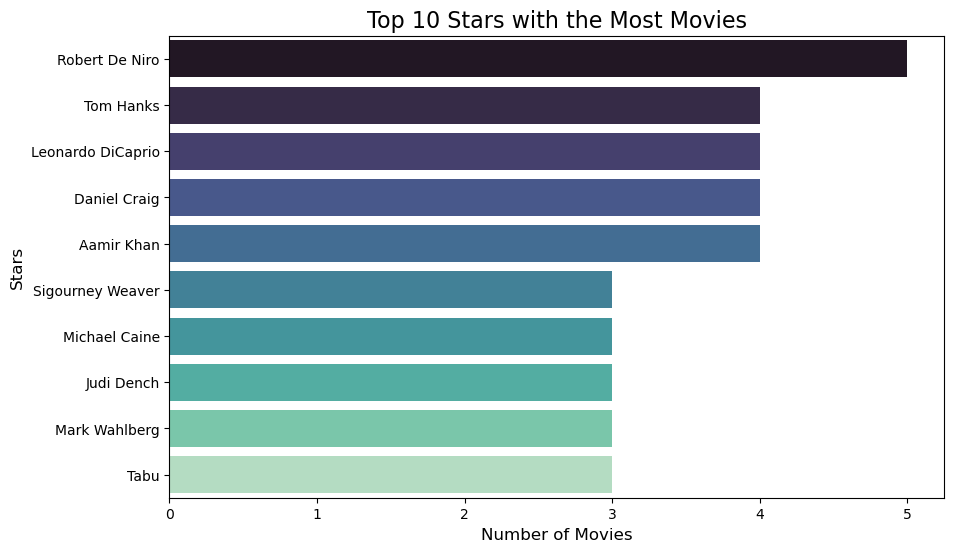

In [92]:
# Visulisations
all_stars = pd.concat([merged_df['Star1'], merged_df['Star2'], merged_df['Star3'], merged_df['Star4']])
top_stars = all_stars.value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_stars.values, y=top_stars.index, palette='mako')
plt.title('Top 10 Stars with the Most Movies', fontsize=16)
plt.xlabel('Number of Movies', fontsize=12)
plt.ylabel('Stars', fontsize=12)
plt.show()


Visualization 1 top 10 actors with the most movies:
The first visualization shows the top 10 actors who have starred in the most movies. To make the visualization. To create this visualization the columns “star1, star2, star3 and star4” were concatenated into a single column using the ‘pandas.concat’ function (Geeks, 2024), Next ‘all_stars.value_counts()’ was used to count how many time each actor appeared in the concatenated series. Finally, an output of top 10 actors was generated along with the number of times they appeared in movies.
A horizontal bar plot was created using the seaborn.barplot function to determine which actors have the highest number of movies. According to the analysis it was deduce that ‘Claudia Cardinale, Joseph GordonLevitt, Gerard Butler and George MacKay’ had the most amount reoccurring movie appearances. All 4 of these actors had the same number of movies which are 20.


C:\Users\Farhan Butt\AppData\Local\Temp\ipykernel_20288\498377466.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=platform_counts.index, y=platform_counts.values, palette='mako')


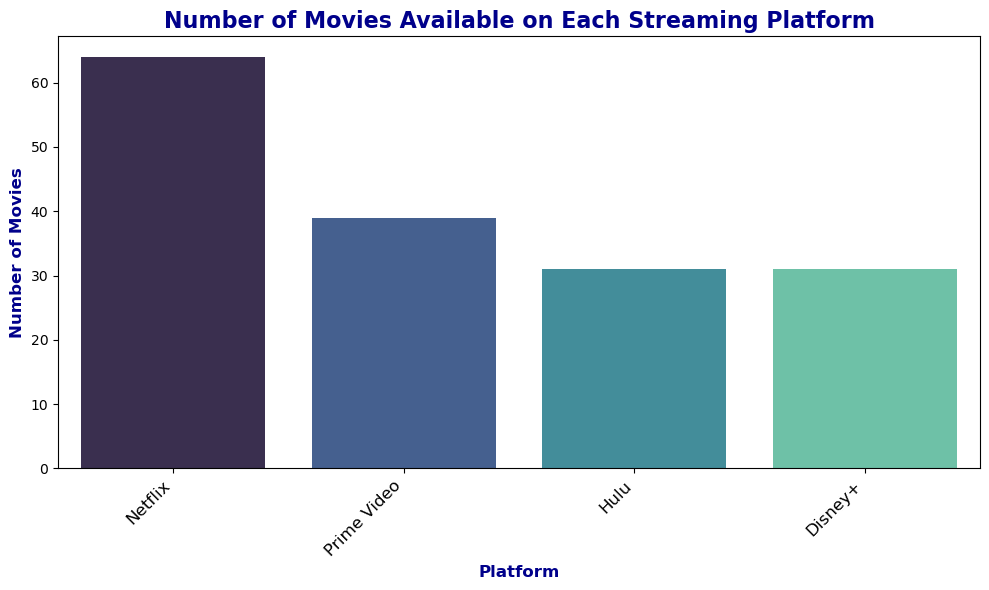

In [110]:
#Visulisation 2: which platform has the most imdb movies
# Step 1: Defineed the platform columns
platform_columns = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']

# Step 2: Reshapeed the platform columns to long format
platform_df = merged_df.melt(id_vars=['Series_Title'],  # Reshape by movie titles
                             value_vars=platform_columns,  # Columns for platforms
                             var_name='Platform', 
                             value_name='Available')

# Step 3: Filter rows where 'Available' is 1 (indicating the movie is available on that platform)
platform_df = platform_df[platform_df['Available'] == 1]

# Step 4: Count the number of movies available on each platform
platform_counts = platform_df['Platform'].value_counts()

# Step 5: Visualize the number of movies on each platform
plt.figure(figsize=(10, 6))  
sns.barplot(x=platform_counts.index, y=platform_counts.values, palette='mako')

# Step 6: Add title and axis labels with better formatting
plt.title('Number of Movies Available on Each Streaming Platform', fontsize=16, weight='bold', color='darkblue')
plt.xlabel('Platform', fontsize=12, weight='bold', color='darkblue')
plt.ylabel('Number of Movies', fontsize=12, weight='bold', color='darkblue')

# Step 7: Rotate the X-axis labels to prevent overlap and graph presented
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()  # Ensure everything fits without overlap
plt.show()


Visualization 2 Platforms with most IMDB top movies:
The second visualization is to determine which platform has the most IMDB top movies. To Determine this first the platform columns were defined which were (‘Netflix, Hulu, ‘Prime Video’ and Disney+). Now obviously this is rather a complexed analysis to do. To make the analysis, the data was reshaped using ‘pandas.melt’ which helps unpivoting data frame from wide format to long format as there are 5 columns into play. 
The ’melt’ function is applied with specific parameters:
•	‘id_vars’ on ‘series_title’: to keep the movies in the reshaped data so that the data doesn’t get hindered with. 
•	‘ value_vars’: is used on ‘platform_columns’ which focuses on the column representing if the movies are available on a specific platform or not. 
•	 ‘var_name’: helps create a new column called platform which holds the names for all of the platforms available in the data set. 
•	 ‘ value_name’ : The last parameter i used to create another column called ‘available’ where the value is 1 if a movie is available and 0 if it’s not. (Geek for Geeks, 2024). 
So instead of having a separate column for each platform in the data set, the data is transformed into one column for availability and another column for platforms which makes it easier to analyse the data in the data set. Once the logic is implemented a count Is initiated to count the number of movies across each platform.
To visualize the new data bar chart is created which depicts that out of the 4 platforms, Netflix has the highest number of IMDB rated movies with Amazon prime coming in the second place, Hulu on the third and Disney plus at fourth. Netflix having a staggering 100 plus movies shows it’s the leading platform. In the bar chart the y-axis represents the total number of movies whereas the x-axis consists of the names of the streaming platforms. 


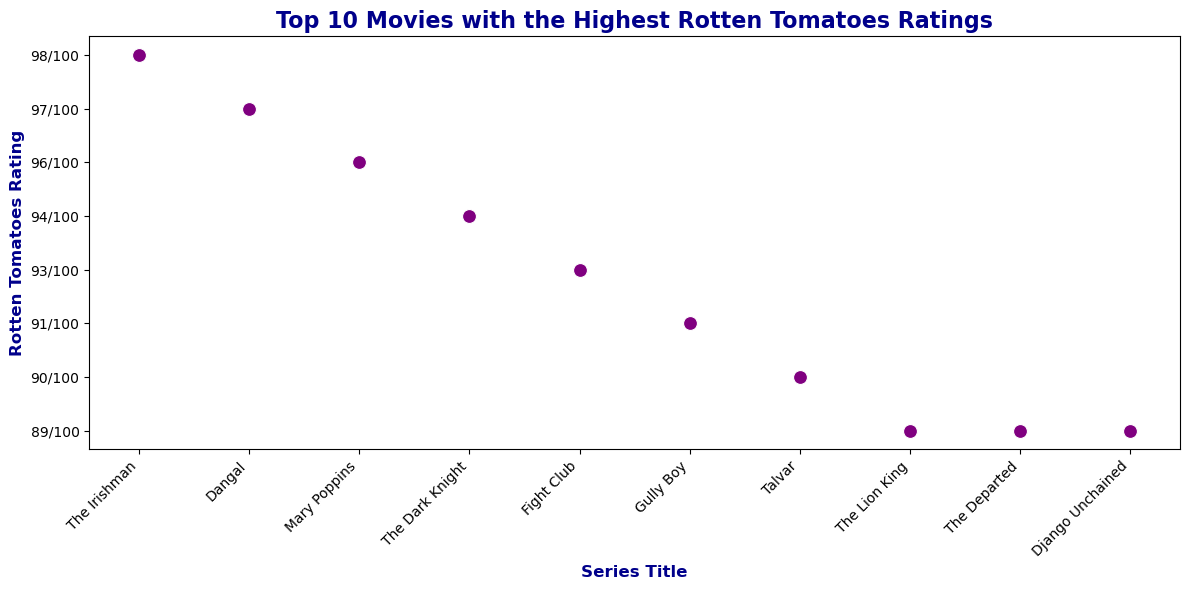

In [112]:
# VISULISATION 3 rotten tomatoes against movie scatter plot
# Step 1: Sorting the merged dataframe by Rotten Tomatoes ratings
sorted_df = merged_df.sort_values(by='Rotten Tomatoes', ascending=False)

# Step 2: Selecting top 10 movies with the highest Rotten Tomatoes ratings
top_10_rt = sorted_df[['Series_Title', 'Rotten Tomatoes']].head(10)

# Step 3: Created a scatter plot to show the relationship between Rotten Tomatoes and Series Title
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Series_Title', y='Rotten Tomatoes', data=top_10_rt, color='purple', s=100, marker='o')

# Step 4: Added title and labels with better formatting
plt.title('Top 10 Movies with the Highest Rotten Tomatoes Ratings', fontsize=16, weight='bold', color='darkblue')
plt.xlabel('Series Title', fontsize=12, weight='bold', color='darkblue')
plt.ylabel('Rotten Tomatoes Rating', fontsize=12, weight='bold', color='darkblue')

# Step 5: Rotated X-axis labels to prevent overlap and adjust for readability
plt.xticks(rotation=45, ha='right', fontsize=10)

# Step 6: Showing the plot
plt.tight_layout()  # Ensure everything fits without overlap
plt.show()



Visualization 3 Rotten tomatoes against top10 movies:
The next visualization is determining the top10 movies with the highest rotten tomato ratings. This is done using the ‘sort_values()’ function which is necessarily used to sort the rotten tomatoes rating. The rating sorted in descending order to ensure that the highest rotten tomatoes ratings come first. 
After implementing the logic a scatter plot was decided to be made as It is easy to read and they identify correlation which means it allows you to compare to variable which In my case are rotten tomatoes ratings and movie titles and helps determine a relationship between them, (Indeed Editorial Team, 2024). The x-axis of the graph represents the series title whereas the y-axis represents the ratings. 
From the visualization it was determined that the Irishman was in the lead with a 98/100 score making it the most liked movie by the audience.


C:\Users\Farhan Butt\AppData\Local\Temp\ipykernel_20288\3448082215.py:28: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=platform_counts.index, y=platform_counts.values, marker='o', palette='coolwarm')


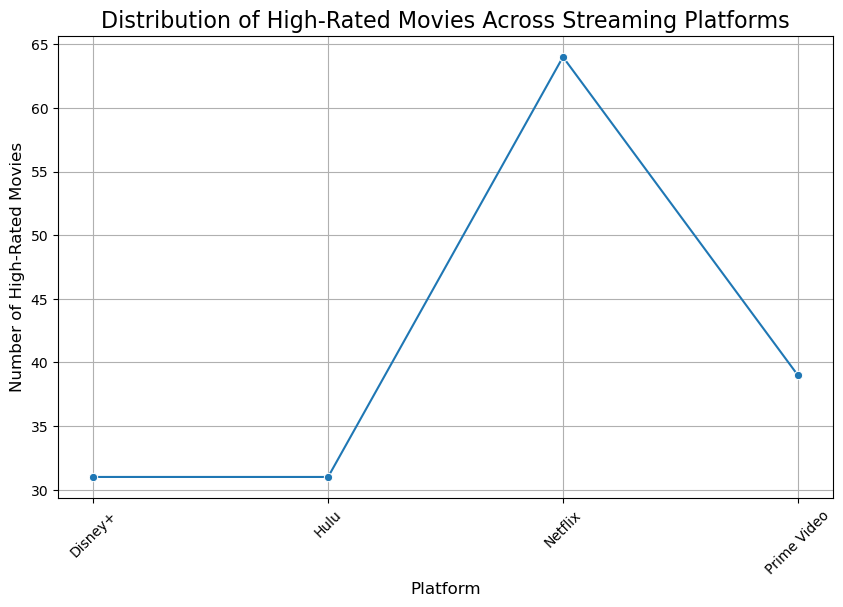

In [106]:
# # visulisation 4
# Step 1: Cleaning data to ensure 'IMDB_Rating' and platform columns are numeric
merged_df['IMDB_Rating'] = pd.to_numeric(merged_df['IMDB_Rating'], errors='coerce')

# Step 2: Removed rows with missing values for IMDB_Rating or platforms
merged_df_clean = merged_df.dropna(subset=['IMDB_Rating'])

# Step 3: Defined platform columns (e.g., Netflix, Hulu, Prime Video, Disney+)
platform_columns = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']

# Step 4: Filtered for high IMDB ratings (e.g., movies with IMDB rating > 7.5)
high_rated_movies = merged_df_clean[merged_df_clean['IMDB_Rating'] > 7.5]

# Step 5: Reshaped the platform columns to long format
platform_df = high_rated_movies.melt(id_vars=['Series_Title', 'IMDB_Rating'], 
                                     value_vars=platform_columns, 
                                     var_name='Platform', 
                                     value_name='Available')

# Step 6: Filtered rows where 'Available' is 1 (indicating the movie is available on that platform)
platform_df = platform_df[platform_df['Available'] == 1]

# Step 7: Counted the number of high-rated movies available on each platform
platform_counts = platform_df.groupby('Platform').size()

# Step 8: Plotting the results using a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=platform_counts.index, y=platform_counts.values, marker='o', palette='coolwarm')
plt.title('Distribution of High-Rated Movies Across Streaming Platforms', fontsize=16)
plt.xlabel('Platform', fontsize=12)
plt.ylabel('Number of High-Rated Movies', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Visualization 4 high rated movies across streaming platforms:
This visualization is rather one of the most important ones as it will help depict which platform has the highest rated IMDB movies. According to self-analysis any rating higher than 7.5 would be considered a top tier movie. 
To implement this task first a check has been implied which makes sure all the values in the IMDB column are numeric with the help of pandas built in function “pd.to_numeric()” (Geeks for Geeks, 2024)with “pd.drop” functionality to drop any rows with missing ratings.
After the check is successfully completed the 4 streaming platforms as mentioned before are added with a filter to check for movies with rating >7.5 to make sure that the analysis is done with only the highest rated movies. Next, similar to the Visualization 2 the “melt()” functionality was used to avoid having a check on multiple columns separately but rather transforming the platform columns into a long format with the same 4 parameters as explained before with an additional  “groupby('Platform').size()” pandas built in size functionality to count the number of high rated movies across all 4 platforms. (W3 schools, 2024)
To properly analyse this it is very important to choose the correct visualization to not confuse or hinder with the analysis. A scatter plot was created to depict as they are easier to read and helps display curved or irregular data points (Indeed Editorial Team, 2024). The plot was created with the name of the “Platforms” on the x-axis and “The Number of High Rated Movies” on it’s y-axis. The visualization shows that Netflix had yet been again at the top of the chart with a staggering number of over a 100 top highly rate IMDB movies, with Prime Video securing second place, third going to HULU and Disney+ standing at the last place with high rated movies.


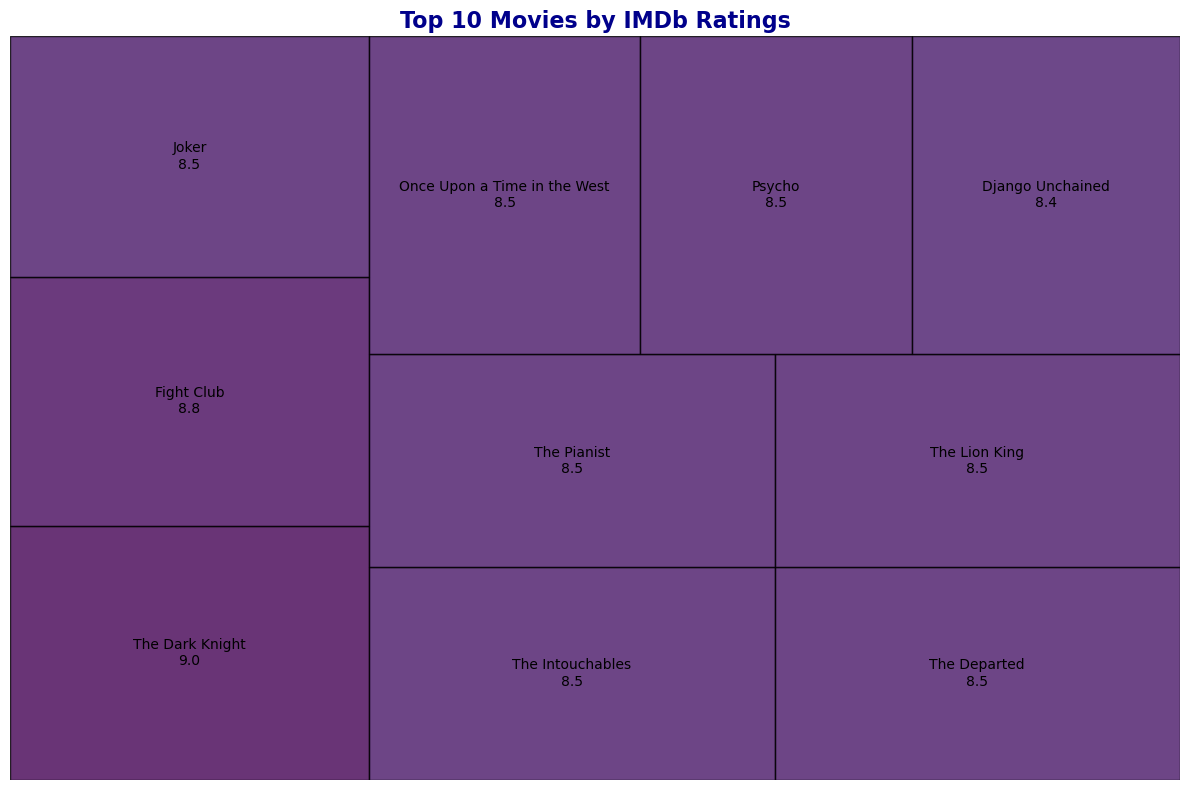

In [108]:
# VISULISATION 5
# Treemap for IMDb
# Sorting the dataset by IMDb ratings and select the top 10 movies
top_10_imdb = merged_df.sort_values(by='IMDB_Rating', ascending=False).head(10)

# Prepared data for the treemap
labels = top_10_imdb['Series_Title'] + '\n' + top_10_imdb['IMDB_Rating'].astype(str)
sizes = top_10_imdb['IMDB_Rating']

# Created the treemap
plt.figure(figsize=(12, 8))
squarify.plot(
    sizes=sizes,
    label=labels,
    alpha=0.8,
    color=plt.cm.viridis_r(sizes / sizes.max()),
    edgecolor="black"  # Add black borders
)

# Added title and formatting
plt.title('Top 10 Movies by IMDb Ratings', fontsize=16, weight='bold', color='darkblue')
plt.axis('off')  # Turn off axes
plt.tight_layout()
plt.show()

Visualization 5 Top 10 IMDB movies:
This part of the code depicts the top 10 movies available on IMDB with a tree map visualization to show which movies are first off present in the top 10 with their IMDB ratings. To achieve this the data set “IMDB_ratings” was sorted into ascending order to ensure that the highest rated movies come to the top after which the “series_title” and the “IMDB_Ratings”were converted into a single label using “.astype(str)”. First 10 rows of the sorted data with the highest rating numbers were displayed using a tree map which was built with the use of pythons built in library of “squarify”. The visualization depicted that “The Dark Knight” had the highest rating of 9.0 declaring it the highest rated IMDB movie.


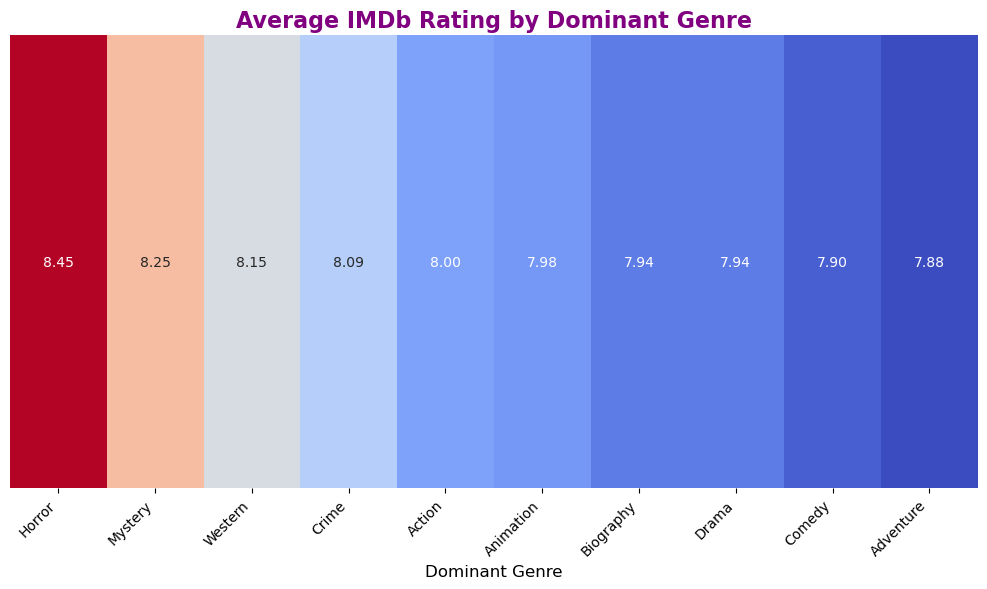

                   Series_Title Released_Year Certificate  Runtime  \
0               The Dark Knight          2008          UA  152 min   
1                    Fight Club          1999           A  139 min   
2                         Joker          2019           A  122 min   
3              The Intouchables          2011          UA  112 min   
4                  The Departed          2006           A  151 min   
5                   The Pianist          2002           R  150 min   
6                 The Lion King          1994           U   88 min   
7  Once Upon a Time in the West          1968           U  165 min   
8                        Psycho          1960           A  109 min   
9                        Dangal          2016           U  161 min   

                         Genre  IMDB_Rating  Meta_score           Director  \
0         Action, Crime, Drama          9.0        84.0  Christopher Nolan   
1                        Drama          8.8        66.0      David Finche

In [879]:
# Plotting the genres vs IMDb ratings
genre_rating = merged_df.groupby('Dominant_Genre')['IMDB_Rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.heatmap(genre_rating.to_frame().T, annot=True, cmap='coolwarm', cbar=False, fmt=".2f")
plt.title('Average IMDb Rating by Dominant Genre', fontsize=16, weight='bold', color='purple')
plt.xlabel('Dominant Genre', fontsize=12)
plt.xticks(rotation=45, ha='right') 
plt.yticks([])
plt.tight_layout()
plt.show()
# --------------------------------------------------------------------------------

print(merged_df.head(10))

Visualization 6 Genres vs IMDB ratings:
The last visualization is of IMDB ratings against genres to see which genre of movies have highest IMDB ratings. To depict this a heat map is created as they are easier to analyze because of their visually appealing nature which makes them more accessible to people who are not necessarily accustomed to analyzing large amounts of complex data. The heat map depicted that the “Horror” movie genre had the highest rating of 8.45 meaning that most movies with highest ratings a generally horror movies. The lowest rating by genre was given to “comedy” and “family” with the rating of “7.80”. 


CONCLUSION:
In conclusion the project successfully analyzed to major data sets IMDB and streaming platforms through data cleaning, wrangling and different visualization techniques. With the cleaned and wrangled data different insights were revealed such as identifying the most popular streaming platform, recognizing the top actors who have starred in most of the movies along with identifying trends in highest rated movies based on rotten tomatoes and IMDB scores.
The Visualizations also provided insights as to how different genres and platforms compare in terms of movie ratings and availability which are crucial to understand what platform stands out in the entertainment industry.
Overall, the project demonstrates the power of wrangling, cleaning and creating visualizations to understand the trends and insights related to large sums of data. By effectively analyzing data we can uncover a deeper understanding of the factors which influence movie success and platform popularity.


REFERENCES:Abdallah, M., 2023. linkedin. [Online] 
Available at: https://www.linkedin.com/pulse/when-how-handle-missing-inaccurate-values-dataset-machine-abdallah/
Delovski, B., 2023. edlitera.com. [Online] 
Available at: https://www.edlitera.com/blog/posts/pandas-merge-dataframes#:~:text=The%20inner%20merge%20procedure%20will,of%20you%20familiar%20with%20SQL.
Geek for Geeks, 2024. geekforgeeks.org. [Online] 
Available at: https://www.geeksforgeeks.org/python-pandas-split-strings-into-two-list-columns-using-str-split/
Geek for Geeks, 2024. geekforgeeks.org. [Online] 
Available at: https://www.geeksforgeeks.org/how-to-rename-columns-in-pandas-dataframe/
Geek for Geeks, 2024. geekforgeeks.org. [Online] 
Available at: https://www.geeksforgeeks.org/python-pandas-melt/
GeekforGeeks, 2024. geekforgeeks.org. [Online] 
Available at: https://www.geeksforgeeks.org/python-pandas-dataframe-drop_duplicates/
Geeks for Geeks, 2024. geeksforgeeks.com. [Online] 
Available at: https://www.geeksforgeeks.org/python-pandas-to_numeric-method/
Geeks, G. f., 2024. geekforgeeks.org. [Online] 
Available at: https://www.geeksforgeeks.org/pandas-concat-function-in-python/
Google for Education, 2024. developers.google.com. [Online] 
Available at: https://developers.google.com/edu/python/regular-expressions#:~:text=Substitution%20(optional)-,The%20re.,from%20the%20original%20matching%20text.
Indeed Editorial Team, 2024. Indeed. [Online] 
Available at: https://www.indeed.com/career-advice/career-development/a-guide-to-scatter-plots
Indeed Editorial Team, 2024. Indeed.com. [Online] 
Available at: https://www.indeed.com/career-advice/career-development/a-guide-to-scatter-plots#:~:text=Advantages%20of%20scatter%20plots&text=Scatter%20plots%20allow%20you%20to,curved%20or%20irregular%20data%20points.
Kamradt, G., 2020. Youtube. [Online] 
Available at: https://www.youtube.com/watch?v=zNvxJNQhmRs
MIAMI UNIVERSITY, n.d. miamioh.edu. [Online] 
Available at: https://miamioh.edu/centers-institutes/center-for-analytics-data-science/students/coding-tutorials/python/data-cleaning.html#:~:text=Next%2C%20we%20would%20like%20to,False%20for%20non%2Dmissing%20cells.
Optimizely, 2024. optimizely.com. [Online] 
Available at: https://www.optimizely.com/optimization-glossary/heatmap/#:~:text=Heatmaps%20can%20be%20used%20to,successful%20in%20their%20optimization%20efforts.
P., Y., 2023. [Online] 
Available at: https://www.linkedin.com/pulse/how-do-you-handle-missing-data-dataset-yagnesh-pandya-kpufc/
pandas, 2024. pandas.pydata.org. [Online] 
Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html
SaturnCloud, 2023. saturncloud.io. [Online] 
Available at: https://saturncloud.io/blog/how-to-apply-regex-to-a-pandas-dataframe/#:~:text=Regex%20is%20a%20sequence%20of,specific%20text%20from%20a%20string.
Schwartz, D., 2022. aporia.com. [Online] 
Available at: https://www.aporia.com/resources/how-to/drop-rows-pandas-dataframe-column-vamue-nan/#:~:text=a%20certain%20column.-,Pandas,to%20use%20the%20subset%20parameter.
trymito, 2024. trymito.io. [Online] 
Available at: https://www.trymito.io/excel-to-python/functions/math/MEDIAN
W3 schools, 2024. w3schools.com. [Online] 
Available at: https://www.w3schools.com/python/pandas/ref_df_size.asp#:~:text=The%20size%20property%20returns%20the,rows%20*%20the%20number%20of%20columns.
W3schools, 2024. w3schools.com. [Online] 
Available at: https://www.w3schools.com/python/pandas/ref_df_fillna.asp
W3schools, 2024. w3schools.com. [Online] 
Available at: https://www.w3schools.com/python/pandas/ref_df_merge.asp

